---



# Define the problem. What is the input? What is the output?

Estimating how likely people will like the product, without actually listing out there.

In other word: Predicting the product ratings of Wish.com products based on a set of features included given a tabular dataset.

The dataset contains some information about a set of products and the ratings of these products.

These information include :
- Product Info
- Marchant info
- Tags
- Badges
- Flags
- Ratings

Ratings are in categories from 1 to 5.

---

# What data mining function is required?

Since the goal is to predict product ratings based on other features of the product, the required data minig function is the classification.

---

# What could be the challenges?

Challenges may include handling not clean or noisy data, missing values and irrelevant or unnecessary features also the features may not be accurate and that may lead to mis-prediction as we say GIGO and to avoid that, we will need to do a lot of data cleaning and data preproccessing and feature selection as much as we can.




---

# What is the impact?

It helps us to understand under what certain conditions that a product will be highly rated, as a way to understand the customer base of the wish.com.

---

# What is an ideal solution?


After trail and error and days in cleaning and preproccessing and trying different models to get the highest F1 score and accuracy I found that the DecisionTreeClassifier is the best model in the most cases. 


---

# Import Common and Useful Libraries
I imported some useful and common libraries here, then I imported sklearn models, metrics, feature selection and scaling libiraries

I stop displaying warnings and stop the limitation of displaying the dataframe.

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", None)

# Reading the Data
Reading the Training Data and the Test Data as a tabular dataset.

In [6]:
data = pd.read_csv('train_new.csv')
test_data = pd.read_csv('test_new.csv')

# Show data sample
The dataset contains 34 columns:
1. 'price'
2. 'retail_price'
3. 'currency_buyer'
4. 'units_sold'
5. 'uses_ad_boosts'
6. 'rating'
7. 'rating_count'
8. 'badges_count'
9. 'badge_local_product'
10. 'badge_product_quality'
11. 'badge_fast_shipping'
12. 'tags'
13. 'product_color'
14. 'product_variation_size_id'
15. 'product_variation_inventory'
16. 'shipping_option_name'
17. 'shipping_option_price'
18. 'shipping_is_express'
19. 'countries_shipped_to'
20. 'inventory_total'
21. 'has_urgency_banner'
22. 'urgency_text'
23. 'origin_country'
24. 'merchant_title'
25. 'merchant_name'
26. 'merchant_info_subtitle'
27. 'merchant_rating_count'
28. 'merchant_rating'
29. 'merchant_id'
31. 'merchant_has_profile_picture'
32. 'merchant_profile_picture'
33. 'theme'
34. 'crawl_month'
35. 'id'

Display the columns of the training dataset.

In [7]:
data.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

# Data Cleaning and Pre-processing

After some analysis and observations on Microsoft Excel:
I figured that there are some Features is not collected will and not related to the target output which are:


1.   currency_buyer
2.   badge_local_product
3.   product_variation_inventory
4.   shipping_option_name
5.   shipping_is_express
6.   inventory_total
7.   has_urgency_banner
8.   urgency_text
9.   origin_country
10.   merchant_title
11.   merchant_name
12.   badge_fast_shipping
13.   merchant_has_profile_picture
14.   merchant_profile_picture
15.   theme
16.   crawl_month
17.   badge_product_quality

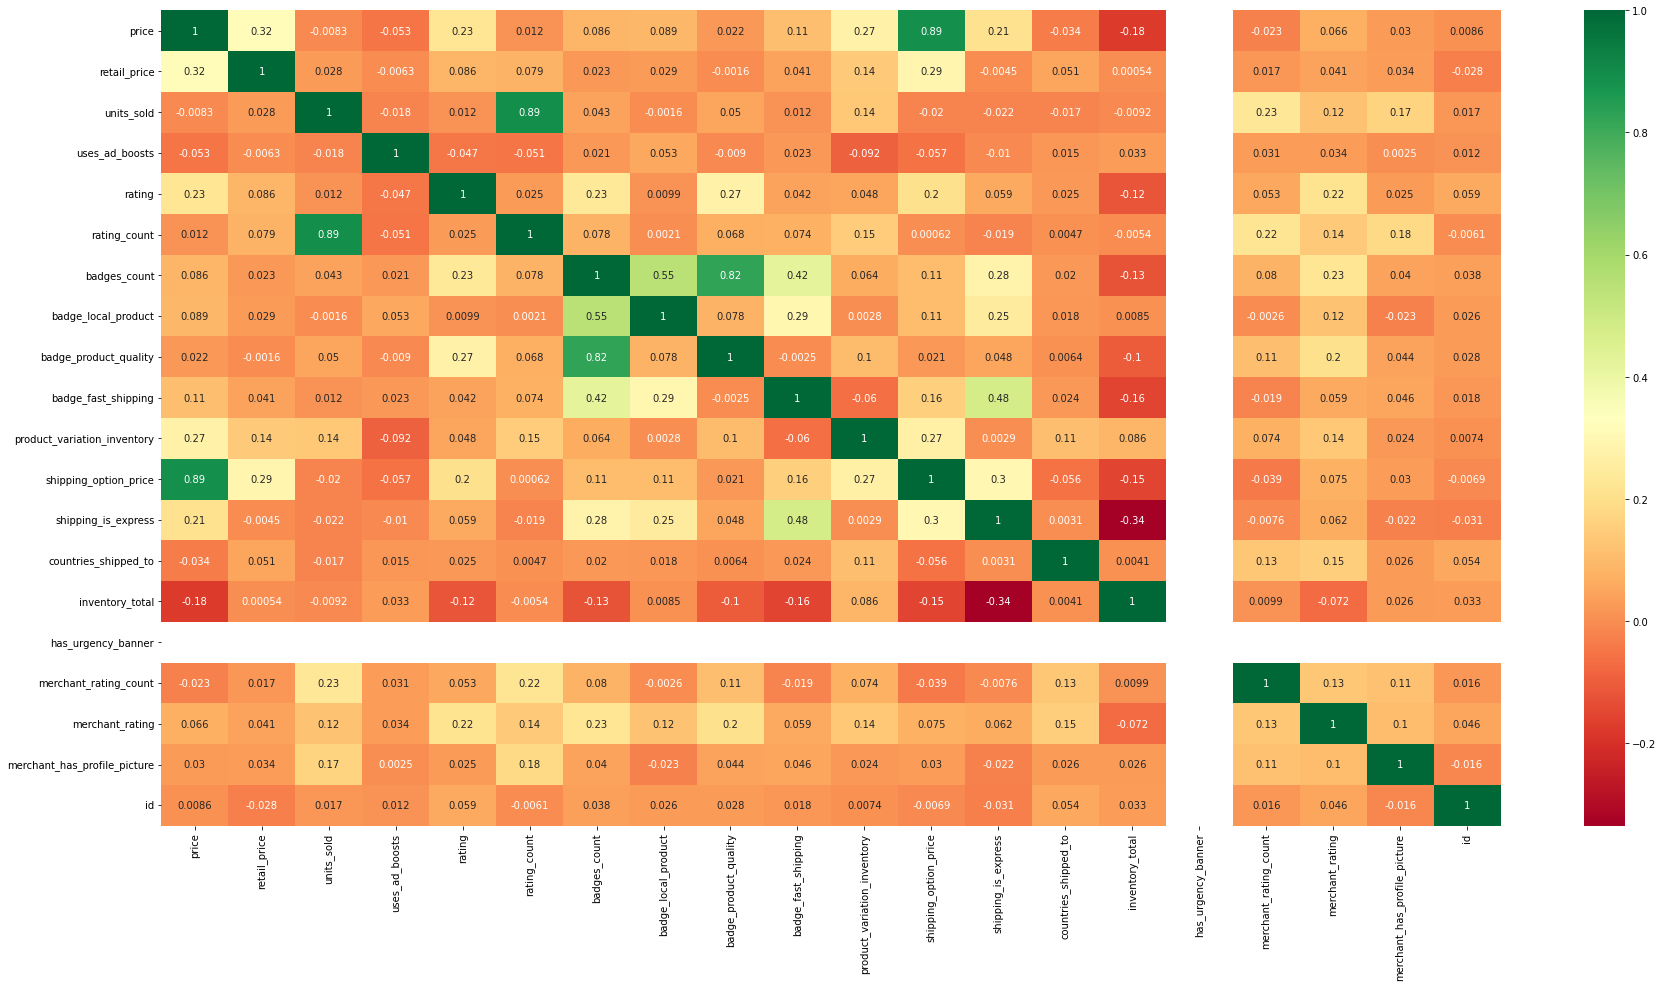

In [8]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

as we see the price is very correlated to shipping_option_price

and the units_sold is very correlated to rating_count

so we will drop the one whos less correlated to the rating

In [9]:
data.drop(columns=['units_sold', 'shipping_option_price'], inplace=True)
test_data.drop(columns=['units_sold', 'shipping_option_price'], inplace=True)


In [10]:
data.drop(columns=['currency_buyer', 'badge_local_product',
                    'product_variation_inventory', 'shipping_option_name',
                    'shipping_is_express', 'inventory_total', 'has_urgency_banner',
                    'urgency_text', 'origin_country','merchant_title',
                    'merchant_name', 'badge_fast_shipping', 'merchant_id',
                    'merchant_has_profile_picture', 'merchant_profile_picture',
                    'theme', 'crawl_month', 'badge_product_quality'
                    ], inplace=True)

test_data.drop(columns=['currency_buyer', 'badge_local_product',
                    'product_variation_inventory', 'shipping_option_name',
                    'shipping_is_express', 'inventory_total', 'has_urgency_banner',
                    'urgency_text', 'origin_country','merchant_title',
                    'merchant_name', 'badge_fast_shipping', 'merchant_id',
                    'merchant_has_profile_picture', 'merchant_profile_picture',
                    'theme', 'crawl_month', 'badge_product_quality',
                    ], inplace=True)

After data observaton, I fount a record that contain a wrong rating value **6**, so I replaced it with **5**

In [11]:
data.rating = data.rating.apply(lambda x: x if x <= 5 else 5)


Min Max Scaling and Label Encoding for preprocessing


In [12]:
minMaxScaler = MinMaxScaler()

label_encoder = LabelEncoder()

The **product_variation_size_id** feature has 84 different values.

So, we did some preprocessing and convert these 88 to 5 categories.

In [13]:
def change_size(size):
    size = str(size).lower()
    if 'x' in size:
        return 'x'
    if 'l' in size:
        return 'l'
    if 'm' in size:
        return 'm'
    if 's' in size:
        return 's'
    else:
        return 'other'

print(f'product_variation_size_id previous unique count: {len(data.product_variation_size_id.unique())}')

data.product_variation_size_id = data.product_variation_size_id.apply(change_size)
test_data.product_variation_size_id = test_data.product_variation_size_id.apply(change_size)

data.product_variation_size_id = label_encoder.fit_transform(data.product_variation_size_id)
test_data.product_variation_size_id = label_encoder.transform(test_data.product_variation_size_id)

print(f'\nproduct_variation_size_id current unique count: {len(data.product_variation_size_id.unique())}')

product_variation_size_id previous unique count: 84

product_variation_size_id current unique count: 5


This **merchant_info_subtitle** feature contain many info but unfortunately it is not includes in all the records so we choose the one which exist in almost all the records which is the notes count.

In [14]:
def notes_count(info):
    infos = str(info).split(' ')
    for info in infos:
        if '(' in info:
            txt = info[1:].replace(',', '')
            if txt.isdigit():
                return txt
    return 0

print('merchant_info_subtitle before preprocessing')
print(data.merchant_info_subtitle.head())

data.merchant_info_subtitle = pd.to_numeric(data.merchant_info_subtitle.apply(notes_count))
data.merchant_info_subtitle = data.merchant_info_subtitle.apply(lambda x : x if x > 0 else data.merchant_info_subtitle.min())
test_data.merchant_info_subtitle =pd.to_numeric(test_data.merchant_info_subtitle.apply(notes_count))
test_data.merchant_info_subtitle = test_data.merchant_info_subtitle.apply(lambda x : x if x > 0 else test_data.merchant_info_subtitle.min())

print('\nmerchant_info_subtitle after preprocessing')
print(data.merchant_info_subtitle.head())

data.merchant_info_subtitle = minMaxScaler.fit_transform(np.array(data.merchant_info_subtitle).reshape(-1,1))
test_data.merchant_info_subtitle = minMaxScaler.transform(np.array(test_data.merchant_info_subtitle).reshape(-1,1))

merchant_info_subtitle before preprocessing
0    88 % avis positifs (66,644 notes)
1    91 % avis positifs (25,752 notes)
2     83 % avis positifs (3,897 notes)
3     87 % avis positifs (7,497 notes)
4       91 % avis positifs (173 notes)
Name: merchant_info_subtitle, dtype: object

merchant_info_subtitle after preprocessing
0    66644
1    25752
2     3897
3     7497
4      173
Name: merchant_info_subtitle, dtype: int64


The **tags** feature can be handled many ways but due to the time limitations, I took the count of tags.

In [15]:
def tags_count(tags):
    return len(str(tags).split(','))

print('Tags before')
print(data.tags.head())

data.tags = pd.to_numeric(data.tags.apply(tags_count), errors='coerce')
test_data.tags = pd.to_numeric(test_data.tags.apply(tags_count), errors='coerce')

print('\nTags after')
print(data.tags.head())

Tags before
0    Summer,soildcolor,Plus Size,Tank,camisole,Tops...
1    bathing suit,Plus Size,bikini set,sexy swimsui...
2    Summer,Vest,momshirt,Get,summer t-shirts,funny...
3    Summer,Shorts,pants,Beach,Plus Size,beachpant,...
4    Summer,Floral print,women dresses,fashion dres...
Name: tags, dtype: object

Tags after
0    16
1    22
2    23
3    16
4    20
Name: tags, dtype: int64


The **product_color** feature has many colors related together so, I replaced them with a common color.

In [16]:
shade_to_color = {
    'blue': ['navyblue', 'lightblue', 'skyblue', 'lakeblue', 'darkblue', 'denimblue', 'navy blue', 'prussianblue', 'navy'],
    'green': ['armygreen', 'army green', 'fluorescentgreen', 'mintgreen', 'light green', 'lightgreen', 'applegreen', 'darkgreen', 'army', 'khaki', 'lightkhaki'],
    'yellow': ['lightyellow'],
    'red': ['winered', 'wine red', 'lightred', 'coralred', 'rose red', 'watermelonred', 'orange-red', 'rosered', 'claret', 'burgundy'],
    'grey': ['gray', 'silver', 'lightgray', 'lightgrey', 'greysnakeskinprint', 'greysnakeskinprint'],
    'brown': ['coffee', 'camel', 'tan'],
    'white': ['offwhite', 'ivory', 'nude'],
    'pink': ['lightpink', 'dustypink', 'rosegold'],
    'purple': ['lightpurple'],
    'black': ['coolblack', 'offblack'],
    'orange': ['apricot'],
}

def update_color(color):
    color = str(color).lower()
    if color in shade_to_color.keys():
        return color
    if '&' in color:
        return 'dual'
    for color_family, sub_colors in zip(shade_to_color.keys(), shade_to_color.values()):
        if color in sub_colors:
            return color_family
    return 'other'

print('Color before')
print(data.product_color.head())

data.product_color = data.product_color.apply(update_color)
test_data.product_color = test_data.product_color.apply(update_color)

data.product_color = label_encoder.fit_transform(data.product_color)
test_data.product_color = label_encoder.transform(test_data.product_color)

print('\nColor after')
print(data.product_color.head())

Color before
0      yellow
1       black
2       white
3    lakeblue
4     apricot
Name: product_color, dtype: object

Color after
0    12
1     0
2    11
3     1
4     6
Name: product_color, dtype: int64


Doing min max scaling to some features

if we removed the scalling phase the results decrease

In [17]:
data.rating_count = minMaxScaler.fit_transform(np.array(data.rating_count).reshape(-1,1))
test_data.rating_count = minMaxScaler.transform(np.array(test_data.rating_count).reshape(-1,1))

data.merchant_rating_count = minMaxScaler.fit_transform(np.array(data.merchant_rating_count).reshape(-1,1))
test_data.merchant_rating_count = minMaxScaler.transform(np.array(test_data.merchant_rating_count).reshape(-1,1))

data.countries_shipped_to = minMaxScaler.fit_transform(np.array(data.countries_shipped_to).reshape(-1,1))
test_data.countries_shipped_to = minMaxScaler.transform(np.array(test_data.countries_shipped_to).reshape(-1,1))

data.price = minMaxScaler.fit_transform(np.array(data.price).reshape(-1,1))
test_data.price = minMaxScaler.transform(np.array(test_data.price).reshape(-1,1))

data.retail_price = minMaxScaler.fit_transform(np.array(data.retail_price).reshape(-1,1))
test_data.retail_price = minMaxScaler.transform(np.array(test_data.retail_price).reshape(-1,1))

Display some information about the data

In [18]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      1094 non-null   float64
 1   retail_price               1094 non-null   float64
 2   uses_ad_boosts             1094 non-null   int64  
 3   rating                     1094 non-null   float64
 4   rating_count               1094 non-null   float64
 5   badges_count               1094 non-null   int64  
 6   tags                       1094 non-null   int64  
 7   product_color              1094 non-null   int64  
 8   product_variation_size_id  1094 non-null   int64  
 9   countries_shipped_to       1094 non-null   float64
 10  merchant_info_subtitle     1094 non-null   float64
 11  merchant_rating_count      1094 non-null   float64
 12  merchant_rating            1094 non-null   float64
 13  id                         1094 non-null   int64

,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,tags,product_color,product_variation_size_id,countries_shipped_to,merchant_info_subtitle,merchant_rating_count,merchant_rating,id
0,0.145833,0.020,1,4.0,0.080505,0,16,12,1,0.166667,0.030644,0.030642,4.137582,272
1,0.145833,0.020,0,4.0,0.040638,1,22,0,0,0.219697,0.011841,0.011839,4.256873,1515
2,0.104167,0.128,0,4.0,0.000482,0,23,11,0,0.250000,0.001792,0.001790,3.928920,940
3,0.076458,0.008,1,3.0,0.003953,0,16,1,4,0.128788,0.003447,0.003445,4.079365,309
4,0.145833,0.036,0,4.0,0.006122,0,20,6,3,0.053030,0.000080,0.000078,4.306358,226


# Display Features Correlation:
- between all the features (one to one).
- between the features and the target.

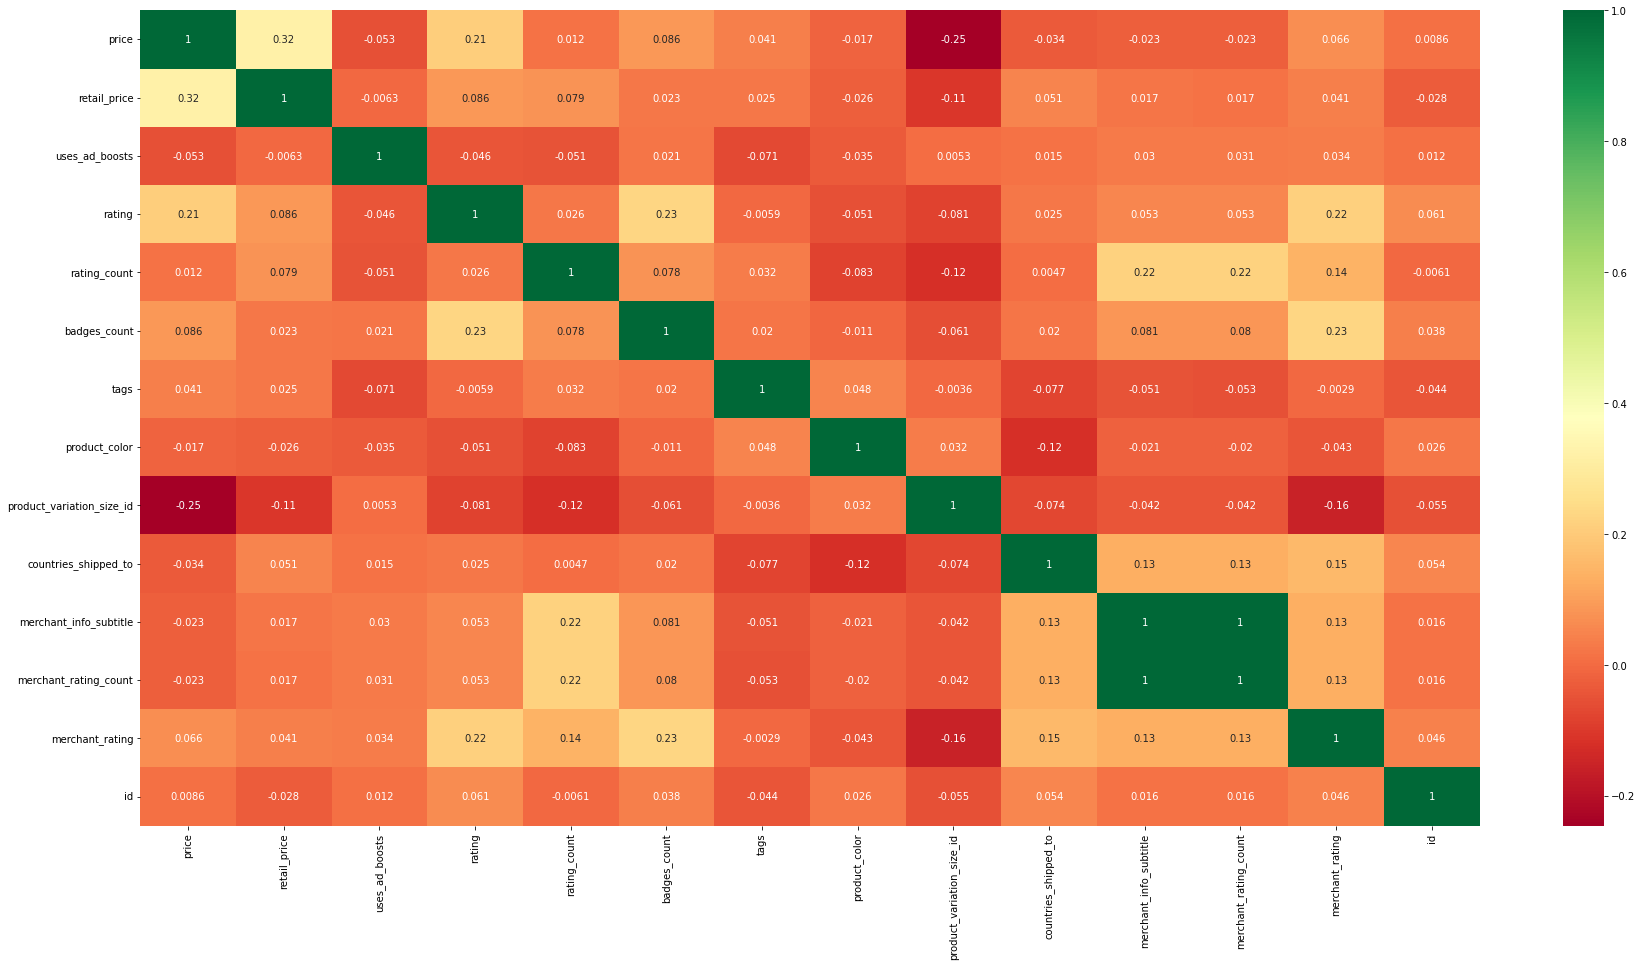

In [19]:
plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

#Split Data to train and test

In [20]:
def trainTestSplit(df):
  X = df.loc[:, df.columns != 'rating']
  Y = df.loc[:, 'rating']
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, shuffle = True, random_state=42)
  return X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = trainTestSplit(data)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(875, 13)
(219, 13)
(875,)
(219,)


# Feature Selection
Select feature with the highest score in multble feature selection method.

In [22]:
selector = VarianceThreshold()
selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[selector.get_support()]

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'tags', 'product_color', 'product_variation_size_id',
       'countries_shipped_to', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [23]:
#Select top 2 features based on mutual info regression
selector = SelectKBest(f_classif, k = 10)
selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[selector.get_support()]

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'tags', 'product_variation_size_id',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [24]:
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10, step=10)
rfe_selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[rfe_selector.get_support()]

Index(['price', 'retail_price', 'rating_count', 'badges_count', 'tags',
       'product_color', 'countries_shipped_to', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [25]:
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators = 100), n_features_to_select=10, step=10)
rfe_selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[rfe_selector.get_support()]

Index(['price', 'retail_price', 'rating_count', 'badges_count', 'tags',
       'product_color', 'countries_shipped_to', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [26]:
# Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=RandomForestClassifier())
sfm_selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[sfm_selector.get_support()]

Index(['price', 'rating_count', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [27]:
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=DecisionTreeClassifier(), n_features_to_select = 10)
sfs_selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[sfs_selector.get_support()]

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'product_color', 'product_variation_size_id',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')

In [28]:
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=RandomForestClassifier(), n_features_to_select = 10)
sfs_selector.fit(X_train.loc[:, X_train.columns != 'id'], y_train)
X_train.loc[:, X_train.columns != 'id'].columns[sfs_selector.get_support()]

Index(['price', 'retail_price', 'uses_ad_boosts', 'rating_count',
       'badges_count', 'tags', 'product_color', 'product_variation_size_id',
       'merchant_rating_count', 'merchant_rating'],
      dtype='object')

Feature score after feature selection

In [29]:
price = 7
rating_count = 7
tags = 6
merchant_rating = 6
countries_shipped_to = 6
merchant_info_subtitle = 5
badges_count = 5
retail_price = 5
units_sold = 5
merchant_rating_count = 4
uses_ad_boosts = 4
product_variation_size_id = 4
shipping_option_price = 3
product_color = 3

Select top features

In [30]:
# columns = X_train.columns != 'id'
columns = ['retail_price', 'uses_ad_boosts', 'rating_count', 'badges_count', 'tags', 'product_color', 'product_variation_size_id', 'countries_shipped_to', 'merchant_info_subtitle', 'merchant_rating']

# Grid Search
We will use grid search For each classifier to find the optimal hyperparameters.


Plot Cross Validation Comparison of the best models from the Grid Search

In [31]:
def plotCrossValidationComparison(model_scores):
  indics = range(1, model_scores.shape[1] + 1)
  ranks = ['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4', 'Rank 5']
  for accuracy, index in zip(model_scores, indics):
    plt.plot(ranks, accuracy, label = f'model: {index}', marker='o', linestyle='dashed')
  plt.title('Cross Validation Comparsion')
  plt.xlabel("CV test fold")
  plt.ylabel("Model Accuracy")
  plt.legend()
  plt.show()

Add the Grid Search to a function
*   Display GridSearch best Hyper-parameters.
*   Display GridSearch summary.


In [32]:
models = []
labels = []

def gridSearch(model, parameters, X_train, y_train):

  grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, scoring = 'accuracy', verbose = 5)
  grid_search.fit(X_train, y_train)
  results = pd.DataFrame(grid_search.cv_results_)
  best_model = grid_search.best_estimator_
  model_name = best_model.__class__.__name__
  models.append(best_model)
  labels.append(model_name)
  print()
  print('*********************************************************************')
  print()
  print(f'{model_name}')
  print()
  print('*********************************************************************')
  print()
  print('After running the grid search with cross validation we found that the best Hyper-Parameter are :')
  print()
  print(grid_search.best_params_)
  print()
  print('*********************************************************************')
  print()
  print('Grid Search Summary :')
  print()
  display(results.sort_values(by=['rank_test_score']).head())
  print()
  print('*********************************************************************')
  print()
  model_scores = results.filter(regex=r"split\d*_test_score")
  plotCrossValidationComparison(model_scores.loc[0:5].values)
  print()
  return best_model

Find the F1-score and store it to plot and compare with the other models

In [33]:
f1scores = []

def classificationReport(model, X_test, y_test):
  y_pred = model.predict(X_test)

  # Store Metrics
  f1score = f1_score(y_test, y_pred, average='micro')
  f1scores.append(f1score)

# 1- Naïve Bayes

We will try different Naive Bayes algrithms:
- Gaussian
- Multinomial
- Complement
- Bernoulli
- Categorical

After trail and error we figure that **Bernoulli** is the most suitable for this problem.

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...........................alpha=1;, score=0.749 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.743 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.743 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.737 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.731 total time=   0.0s
[CV 1/5] END ...........................alpha=2;, score=0.749 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.743 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.743 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.743 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.731 total time=   0.0s
[CV 1/5] END ...........................alpha=3;, score=0.749 total time=   0.0s
[CV 2/5] END ...........................alpha=3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.004119,0.000210,0.001953,0.000070,2,{'alpha': 2},0.748571,0.742857,0.742857,0.742857,0.731429,0.741714,0.005599,1
0,0.005793,0.003595,0.002227,0.000222,1,{'alpha': 1},0.748571,0.742857,0.742857,0.737143,0.731429,0.740571,0.005827,2
2,0.004196,0.000203,0.001995,0.000064,3,{'alpha': 3},0.748571,0.742857,0.737143,0.742857,0.731429,0.740571,0.005827,2
3,0.004276,0.000144,0.002040,0.000077,4,{'alpha': 4},0.748571,0.742857,0.737143,0.742857,0.731429,0.740571,0.005827,2
4,0.004041,0.000071,0.001915,0.000027,5,{'alpha': 5},0.737143,0.742857,0.737143,0.742857,0.731429,0.738286,0.004276,5



*********************************************************************



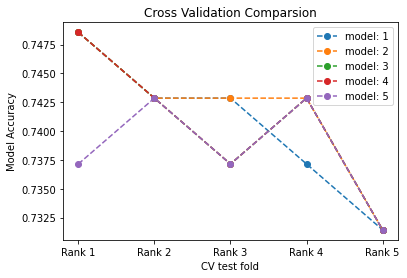

In [34]:
parameters = {'alpha': range(1, 50)}

bernoulliNB = gridSearch(BernoulliNB(), parameters, X_train.loc[:, columns], y_train)
classificationReport(bernoulliNB, X_test.loc[:, columns], y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.709 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.709 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.709 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.709 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.703 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.703 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.709 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
26,0.004634,0.000390,0.003167,0.000092,0.004329,{'var_smoothing': 0.004328761281083057},0.714286,0.714286,0.714286,0.714286,0.691429,0.709714,0.009143,1
24,0.004726,0.000276,0.003121,0.000291,0.006579,{'var_smoothing': 0.006579332246575682},0.720000,0.702857,0.708571,0.714286,0.702857,0.709714,0.006664,1
27,0.005493,0.000869,0.003269,0.000223,0.003511,{'var_smoothing': 0.003511191734215131},0.702857,0.714286,0.720000,0.714286,0.697143,0.709714,0.008398,1
25,0.006255,0.001444,0.003499,0.000331,0.005337,{'var_smoothing': 0.005336699231206307},0.725714,0.714286,0.702857,0.720000,0.685714,0.709714,0.014182,1
28,0.004421,0.000261,0.003105,0.000188,0.002848,{'var_smoothing': 0.002848035868435802},0.702857,0.720000,0.708571,0.714286,0.697143,0.708571,0.008081,5



*********************************************************************



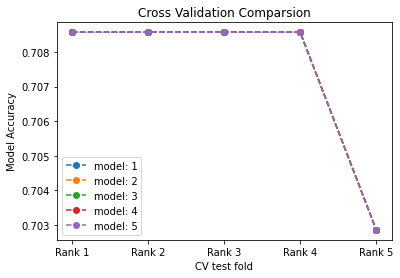

In [35]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gaussianNB = gridSearch(GaussianNB(), parameters, X_train.loc[:, columns], y_train)
classificationReport(gaussianNB, X_test.loc[:, columns], y_test)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...........................alpha=1;, score=0.714 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.720 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.709 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.709 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.691 total time=   0.0s
[CV 1/5] END ...........................alpha=2;, score=0.714 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.720 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.709 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.709 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.697 total time=   0.0s
[CV 1/5] END ...........................alpha=3;, score=0.714 total time=   0.0s
[CV 2/5] END ...........................alpha=3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.004142,0.000705,0.002168,0.000647,4,{'alpha': 4},0.714286,0.720000,0.714286,0.708571,0.697143,0.710857,0.007751,1
4,0.004245,0.001182,0.001872,0.000240,5,{'alpha': 5},0.714286,0.720000,0.714286,0.708571,0.697143,0.710857,0.007751,1
7,0.003613,0.000310,0.001769,0.000074,8,{'alpha': 8},0.725714,0.714286,0.714286,0.708571,0.691429,0.710857,0.011198,1
8,0.003675,0.000093,0.001749,0.000032,9,{'alpha': 9},0.725714,0.714286,0.714286,0.708571,0.691429,0.710857,0.011198,1
48,0.003774,0.001304,0.001780,0.000102,49,{'alpha': 49},0.708571,0.708571,0.720000,0.708571,0.702857,0.709714,0.005599,5



*********************************************************************



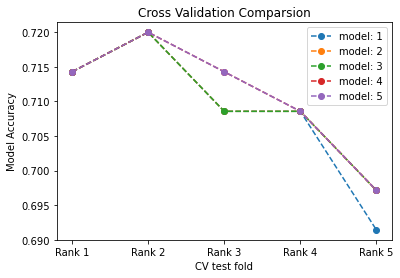

In [36]:
parameters = {'alpha': range(1, 50)}

multinomialNB = gridSearch(MultinomialNB(), parameters, X_train.loc[:, columns], y_train)
classificationReport(multinomialNB, X_test.loc[:, columns], y_test)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ...........................alpha=1;, score=0.509 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.486 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.469 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.543 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.571 total time=   0.0s
[CV 1/5] END ...........................alpha=2;, score=0.509 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.497 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.463 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.549 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.571 total time=   0.0s
[CV 1/5] END ...........................alpha=3;, score=0.509 total time=   0.0s
[CV 2/5] END ...........................alpha=3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,0.003792,0.001021,0.001882,0.000148,49,{'alpha': 49},0.662857,0.702857,0.674286,0.697143,0.662857,0.680000,0.016951,1
47,0.004454,0.001057,0.002116,0.000400,48,{'alpha': 48},0.657143,0.702857,0.662857,0.697143,0.662857,0.676571,0.019327,2
46,0.004599,0.000891,0.002078,0.000409,47,{'alpha': 47},0.657143,0.702857,0.651429,0.697143,0.668571,0.675429,0.020886,3
45,0.003868,0.000152,0.001741,0.000026,46,{'alpha': 46},0.657143,0.714286,0.645714,0.691429,0.668571,0.675429,0.024618,4
44,0.004079,0.000068,0.001846,0.000054,45,{'alpha': 45},0.657143,0.714286,0.645714,0.685714,0.668571,0.674286,0.023973,5



*********************************************************************



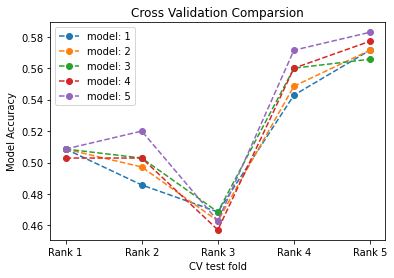

In [37]:
parameters = {'alpha': range(1, 50)}

complementNB = gridSearch(ComplementNB(), parameters, X_train.loc[:, columns], y_train)
classificationReport(complementNB, X_test.loc[:, columns], y_test)

# 2, 3- Support Vector Machines 
I tried many hyperparameter with many different features compinations. 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.408495,0.085818,0.007726,0.000512,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.720000,0.708571,0.708571,0.708571,0.697143,0.708571,0.007228,1
17,0.143912,0.012942,0.013593,0.000173,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.708571,0.702857,0.714286,0.714286,0.697143,0.707429,0.006664,2
0,0.043053,0.006624,0.009756,0.000579,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.708571,0.708571,0.708571,0.708571,0.702857,0.707429,0.002286,3
19,0.047861,0.014163,0.009065,0.002183,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.708571,0.708571,0.708571,0.708571,0.702857,0.707429,0.002286,3
18,0.202754,0.025559,0.013981,0.000530,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.708571,0.708571,0.708571,0.708571,0.702857,0.707429,0.002286,3



*********************************************************************



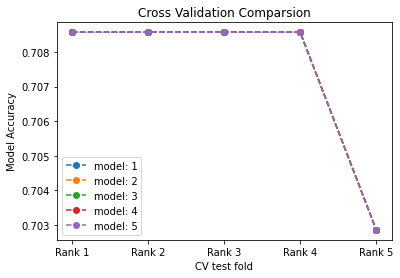

In [38]:
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

svm = gridSearch(SVC(), parameters, X_train.loc[:, columns], y_train)
classificationReport(svm, X_test.loc[:, columns], y_test)

# 4, 5- Decision Trees
I tried many hyperparameter with many different features compinations. 

Streaming output truncated to the last 5000 lines.
[CV 1/5] END criterion=gini, max_depth=22, min_samples_split=13;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=22, min_samples_split=13;, score=0.686 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=22, min_samples_split=13;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=22, min_samples_split=13;, score=0.674 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=22, min_samples_split=13;, score=0.686 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=22, min_samples_split=14;, score=0.651 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=22, min_samples_split=14;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=22, min_samples_split=14;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=22, min_samples_split=14;, score=0.674 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=22, min_samples_split=14;, score=0.68

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
874,0.005738,0.000720,0.001855,0.000080,entropy,5,8,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.777143,0.771429,0.754286,0.771429,0.765714,0.768000,0.007751,1
871,0.007335,0.001751,0.002702,0.000588,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.777143,0.771429,0.754286,0.771429,0.765714,0.768000,0.007751,1
870,0.005814,0.000478,0.001939,0.000028,entropy,5,4,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.771429,0.771429,0.754286,0.771429,0.765714,0.766857,0.006664,3
869,0.006307,0.001143,0.002283,0.000490,entropy,5,3,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.771429,0.771429,0.754286,0.771429,0.765714,0.766857,0.006664,3
868,0.005990,0.000445,0.001994,0.000109,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.777143,0.765714,0.754286,0.771429,0.765714,0.766857,0.007581,3



*********************************************************************



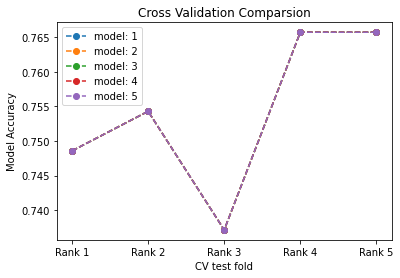

In [39]:
parameters = {'criterion':['gini', 'entropy'], 
              'max_depth':range(2, 30),
              'min_samples_split':range(2, 30)}

d_tree = gridSearch(DecisionTreeClassifier(), parameters, X_train.loc[:, columns], y_train)
classificationReport(d_tree, X_test.loc[:, columns], y_test)

# 6- Random Forest Classifier
As extra work, I tired this classifier to get a higher F1-score and accuracy.

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.743 total time=   0.2s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.811 total time=   0.2s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.800 total time=   0.2s
[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.771 total time=   0.2s
[CV 5/5] END criterion=entropy, max_features=sqrt, n_estimators=50;, score=0.771 total time=   0.2s
[CV 1/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.743 total time=   0.3s
[CV 2/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.783 total time=   0.3s
[CV 3/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.789 total time=   0.3s
[CV 4/5] END criterion=entropy, max_features=sqrt, n_estimators=100;, score=0.794 total time=   0.3s
[CV 5/5] END criterion=entropy, max

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.773033,0.154095,0.035683,0.007041,entropy,sqrt,200,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.748571,0.805714,0.805714,0.805714,0.777143,0.788571,0.022857,1
5,0.288984,0.009060,0.016778,0.002872,entropy,log2,100,"{'criterion': 'entropy', 'max_features': 'log2...",0.748571,0.805714,0.800000,0.794286,0.782857,0.786286,0.020316,2
6,0.625822,0.112374,0.029577,0.005026,entropy,log2,200,"{'criterion': 'entropy', 'max_features': 'log2...",0.748571,0.800000,0.800000,0.805714,0.777143,0.786286,0.021258,2
9,0.263528,0.006623,0.015100,0.000418,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.754286,0.788571,0.811429,0.788571,0.782857,0.785143,0.018286,4
15,0.772450,0.014953,0.041399,0.004762,gini,log2,300,"{'criterion': 'gini', 'max_features': 'log2', ...",0.754286,0.800000,0.805714,0.788571,0.777143,0.785143,0.018286,4



*********************************************************************



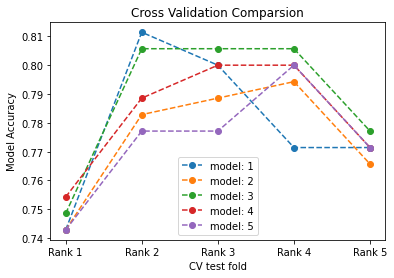

In [40]:
parameters = {'n_estimators': [50, 100, 200, 300],
              'criterion': ['entropy', 'gini'],
              'max_features': ['sqrt', 'log2'],}


rand_forest = gridSearch(RandomForestClassifier(), parameters, X_train.loc[:, columns], y_train)
classificationReport(rand_forest, X_test.loc[:, columns], y_test)

# Score

Plot function for comparing the models F1-scores

In [41]:
def compareBar(data, labels, title):
  caps = []
  for label in labels:
    caps.append(''.join(c for c in label if c.isupper()))
  plt.bar(caps, data, width = 0.4)
  for index, value in enumerate(data):
    x = np.round(value, 2)
    plt.text(index - 0.15, 0.05, str(x))
  plt.title(title)
  plt.show()

[0.7077625570776257, 0.7123287671232877, 0.7123287671232877, 0.6757990867579908, 0.7077625570776257, 0.7671232876712328, 0.7853881278538812]
['BernoulliNB', 'GaussianNB', 'MultinomialNB', 'ComplementNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier']


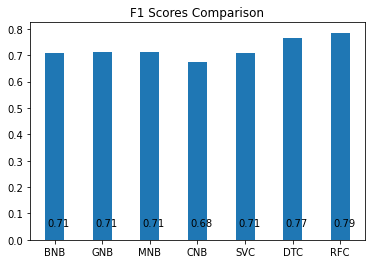

In [42]:
print(f1scores)
print(labels)
compareBar(f1scores, labels, 'F1 Scores Comparison')

# Saving the models score on the test data

In [43]:
def saveScore(model, test_data):
    model_name = model.__class__.__name__
    pred_test = model.predict(test_data.loc[:, columns])
    pred_df = pd.DataFrame(data={'id': test_data.loc[:, 'id'], 'rating': pred_test})
    pred_df.to_csv(f'Adham Mokhtar {model_name}.csv', index=False)
    print(f'Done saving score for {model_name}')

In [44]:
saveScore(rand_forest, test_data)

Done saving score for RandomForestClassifier


In [45]:
saveScore(svm, test_data)

Done saving score for SVC


In [46]:
saveScore(d_tree, test_data)

Done saving score for DecisionTreeClassifier


In [47]:
saveScore(gaussianNB, test_data)

Done saving score for GaussianNB


In [48]:
saveScore(bernoulliNB, test_data)

Done saving score for BernoulliNB


# Why Data Mining is a misnomer? What is another preferred name?

- Because it show that the process is all about extracting data from a source, when in reality, it include data transformation, data integration, data cleaning and data analysis to extract useful insights and knowledge from the data.

- The other name is Knowledge Discovery.

# What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

- The general knowledge discovery process includes the following steps:
  1. Data Selection.
  2. Data Cleaning.
  3. Data Integration.
  4. Data Transformation.
  5. Data Mining
  6. Pattern Evaluation.
  7. Knowledge Representation.
  8. Knowledge Utilization.

- Data engineer is responsible for the design, construct and maintain systems that collect, store and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.

- Data scientist/AI engineer uses statistics and machine learning techniques to analyze data and build models and work on developing algorithms and systems that can automate the process of data analysis and decision-making.


# In data mining, what is the difference between prediction and categorization?

- Prediction is the process of using historical data to make predictions about future events or outcomes.

- Categorization is the process of dividing the data into groups of entities whose members are in some way similar to each other.

- In DM/DS:
  - Classification
    - Target attribute is categorical
  - Prediction
    - Target attribute is numeric

- In ML:
  - Prediction 
    - Supervised Learning
  - Classification
    - Target attribute is categorical
  - Regression
    - Target attribute is numeric


# Why data science/machine learning is a bad idea in the context of information security?

- Data science and machine learning are a bad ideas because there are certain risks and challenges involved in their implementation.

- One of that risks is the potential for bias in the data and models used for analysis.

- Another challenge is the need for privacy and security in the handling of sensitive data.


# What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

- The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.

- Confidentiality refers to the protection of sensitive information from unauthorized access or disclosure. In the context of AI systems and pipelines, confidentiality can be achieved through measures such as access controls, data encryption, and data masking.

- Integrity refers to the accuracy and consistency of data and systems. In the context of AI systems and pipelines, integrity can be ensured through measures such as data validation, error checking, and version control.

- Availability refers to the availability and accessibility of data and systems. In the context of AI systems and pipelines, availability can be ensured through measures such as backup and recovery procedures, redundancy, and load balancing.

- By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure the availability and accessibility of data and systems (availability). This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.
